# Running a spin echo experiment
The first two cells here must be run first, in order, to set up the environment and start talking to the devices. Note that turning off the output also randomizes the phase, unfortunately.

In [18]:
%load_ext autoreload
%autoreload 2

import sys, os
sys.path.append('../../../pyscan-master/')

import pyscan as ps
import matplotlib.pyplot as plt
import numpy as np
import utility as ut
from time import sleep
from datetime import date, datetime
from pathlib import Path
from spinecho_gui import *
from spinecho_scripts import *
if 'devices' not in globals():
    devices = ps.ItemAttribute()
    sig = ps.ItemAttribute()
    sweep = {}

plt.rc('lines', lw=2)
plotfont = {'family': 'serif', 'size': 16}
plt.rc('font', **plotfont)
plt.rc('mathtext', fontset='cm')

wait = 0.3

controls, parameters = spinecho_gui(sig, devices, sweep)
# from IPython.display import display, HTML
# display(HTML("<style>.container { width:100% !important; }</style>"))

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


<Figure size 800x500 with 0 Axes>

<Figure size 800x500 with 0 Axes>

In [19]:
controls

In [8]:
devices.ls335.get_temp()

2.996

In [10]:
stime = 10
devices.scope.average = 1
sleep(0.5)
devices.scope.average = 2
devices.scope.write('acq:state 1')
sleep(stime)
numac = int(devices.scope.query('acq:numacq?'))
print(stime, numac, stime/numac*1000)

10 6713 1.4896469536719799


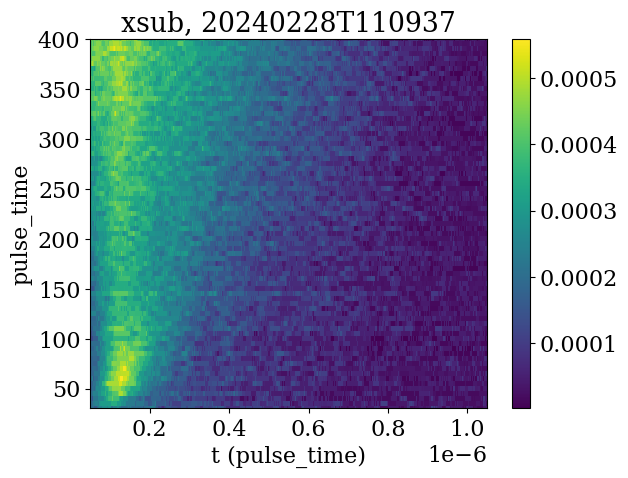

In [6]:
ps.live_plot2D(sweep['expt'], x_name='t', y_name=parameters['y_name'], data_name='xsub', transpose=1) # f = 4278 MHz

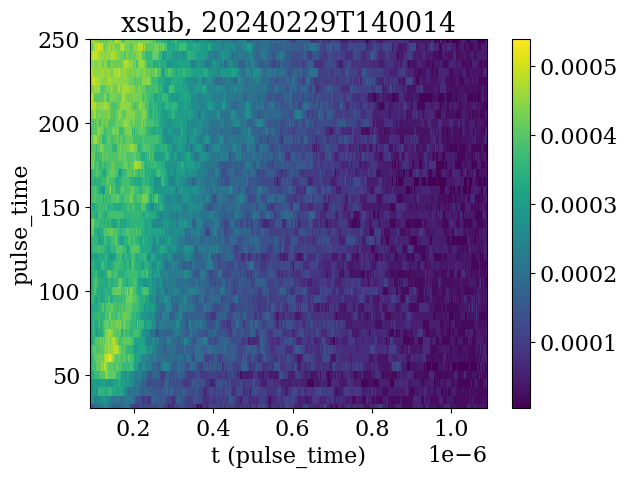

In [3]:
ps.live_plot2D(sweep['expt'], x_name='t', y_name=parameters['y_name'], data_name='xsub', transpose=1) # f = 4089 MHz

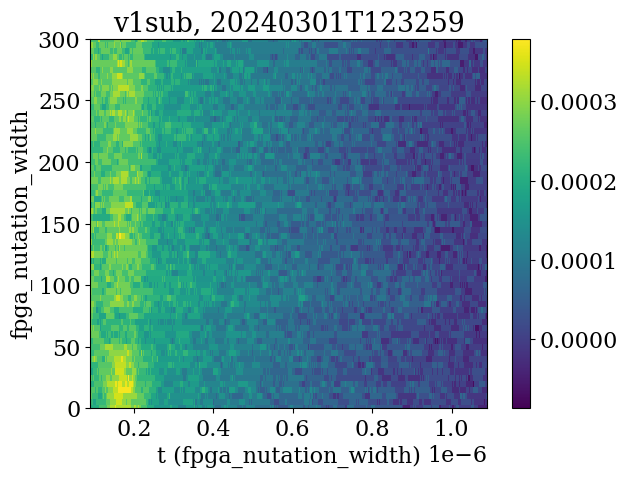

In [11]:
ps.live_plot2D(sweep['expt'], x_name='t', y_name=parameters['y_name'], data_name='v1sub', transpose=1) # f = 4089 MHz

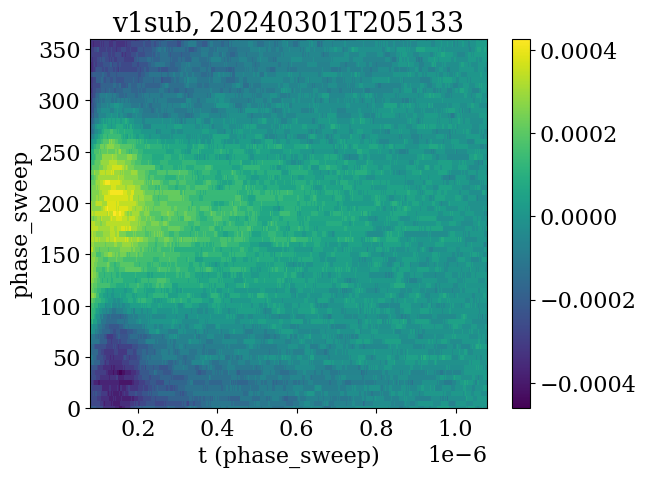

In [23]:
ps.live_plot2D(sweep['expt'], x_name='t', y_name=parameters['y_name'], data_name='v1sub', transpose=1) # f = 4278 MHz

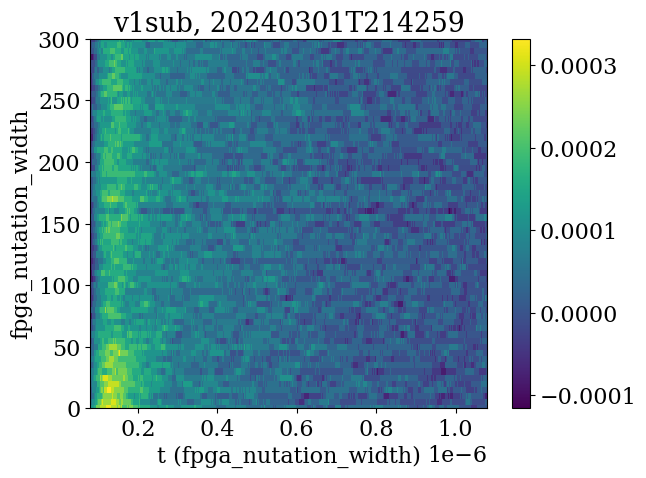

In [25]:
ps.live_plot2D(sweep['expt'], x_name='t', y_name=parameters['y_name'], data_name='v1sub', transpose=1) # f = 4278 MHz

In [24]:
sweep['expt'].maxphase

249.75397502798293

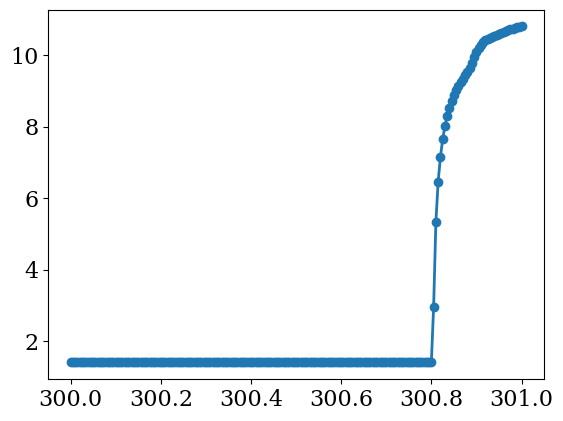

In [26]:
plt.plot(sweep['expt'][parameters['y_name']], sweep['expt'].temp/, 'o-')

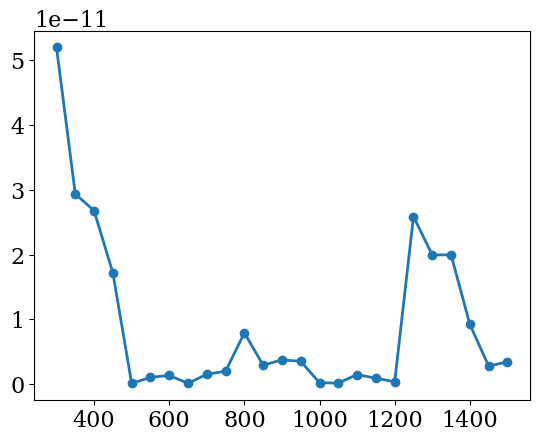

In [13]:
plt.plot(sweep['expt'][parameters['y_name']], np.abs(sweep['expt'].v1int), 'o-')

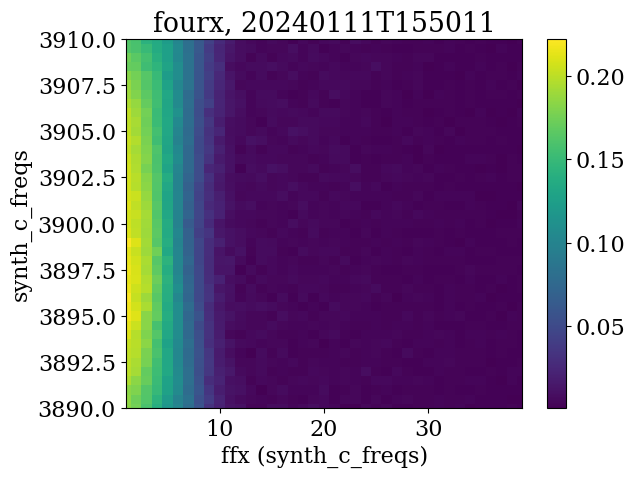

In [43]:
sweep['expt'].fourx = sweep['expt'].fourier[:, 3, 1:40]
sweep['expt'].ffx = sweep['expt'].ffreqs[:, 1:40]/1e6
ps.plot2D(sweep['expt'], x_name='ffx', y_name='synth_c_freqs', data_name='fourx', transpose=1)

In [6]:
def rabifit(x, a, t, T, phi, b):
    return a*np.exp(-x/t)*np.cos(2*np.pi/T*x+phi)+b

def rabifitnophi(x, a, t, T, b):
    return a*np.exp(-x/t)*np.cos(2*np.pi/T*x)+b

117.559539447044

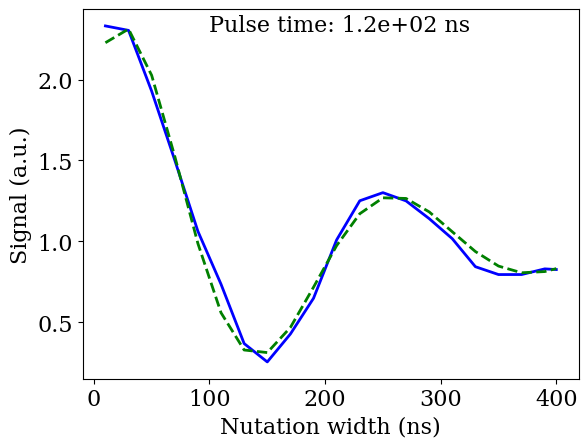

In [12]:
testdat = np.array([sweep['expt'][parameters['y_name']], sweep['expt'].v1int*1e10])
_, ax = plt.subplots()
fit = ut.plot_func_fit(rabifit, testdat, [1, 10, 100, 0, 1], plt=ax)[0]
ax.set_xlabel('Nutation width (ns)')
ax.set_ylabel('Signal (a.u.)')
ax.text(100, 2.3, f'Pulse time: {fit[2]/2:.2g} ns')
fit[2]/2

94.02096329829023

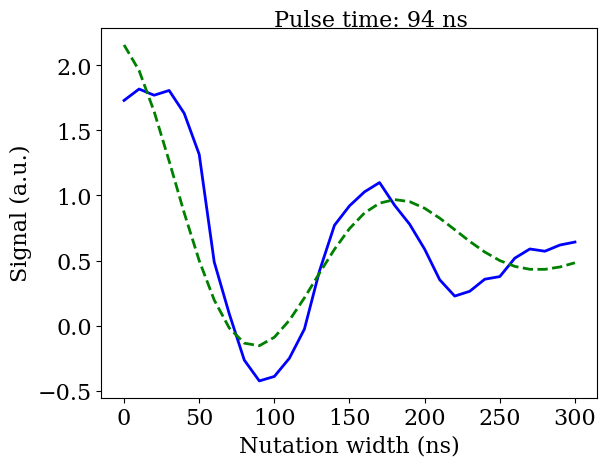

In [17]:
testdat = np.array([sweep['expt'][parameters['y_name']], sweep['expt'].v2int*1e10])
_, ax = plt.subplots()
fit = ut.plot_func_fit(rabifitnophi, testdat, [1, 10, 100, 1], plt=ax)[0]
ax.set_xlabel('Nutation width (ns)')
ax.set_ylabel('Signal (a.u.)')
ax.text(100, 2.3, f'Pulse time: {fit[2]/2:.2g} ns')
fit[2]/2

55.82336180753866

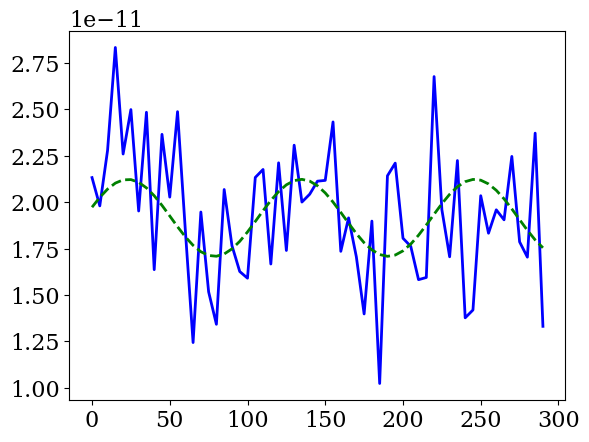

In [27]:
testdat = np.array([sweep['expt'][parameters['y_name']], sweep['expt'].v1int])
fit = ut.plot_func_fit(ut.sinefit, testdat[:, :sweep['runinfo'].indicies[0]-1], [0, 1.5e-5, np.pi/180, 0])[0]
2*np.pi/fit[2]/2

TypeError: rabifit() takes 5 positional arguments but 6 were given

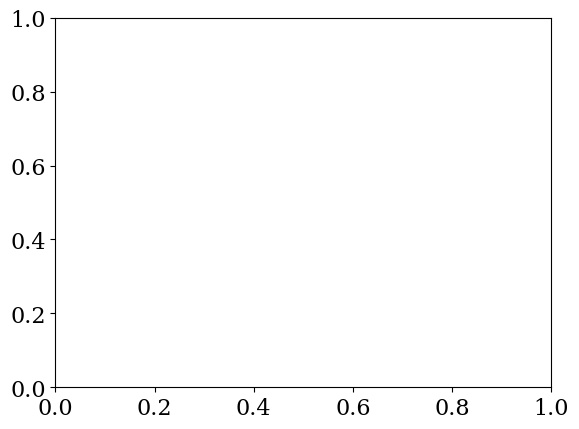

In [26]:
testdat = np.array([sweep['expt'][parameters['y_name']], sweep['expt'].v1int*1e10])
_, ax = plt.subplots()
fit = ut.plot_func_fit(rabifit, testdat, [1, 10, 100, 0, 1], plt=ax)[0]
ax.set_xlabel('Nutation width (ns)')
ax.set_ylabel('Signal (a.u.)')
#ax.text(100, 2.3, f'Pulse time: {fit[2]/2:.2g} ns')
fit[2]/2

array([[1.36931276e-01, 1.86424050e+01, 1.59603411e+02, 5.01408903e+02],
       [1.27190369e-02, 1.13937990e+00, 4.47130486e+00, 1.40470185e+01]])

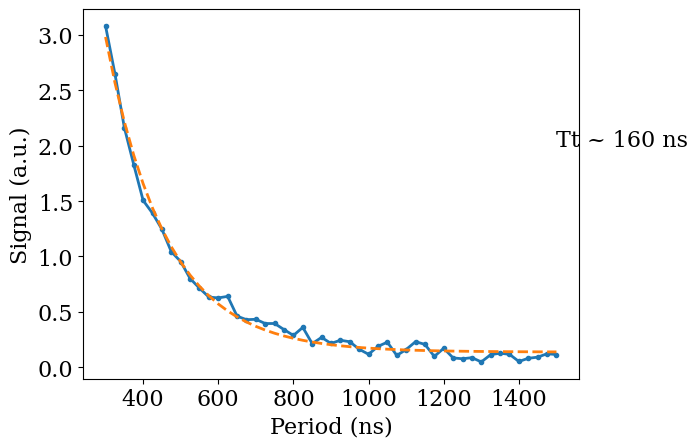

In [8]:
ax = plt.subplots()[1]
fit = ut.plot_exp_fit_norange(np.array([sweep['expt'][parameters['y_name']], sweep['expt'].v1int*1e10]), 1, plt=ax)
ax.set_xlabel('Period (ns)')
ax.set_ylabel('Signal (a.u.)')
ax.text(1500, 2, f'Tt ~ {fit[0][2]:.3g} ns')
fit

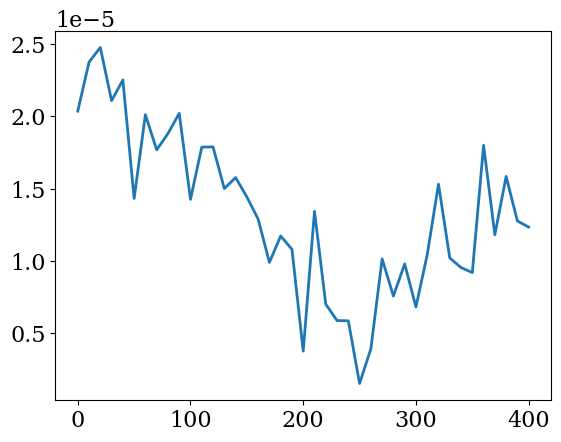

In [41]:
plt.plot(sweep['expt'][parameters['y_name']], sweep['expt'].v1mean)

In [48]:
devices.synth.power_off()
devices.psu.output = False

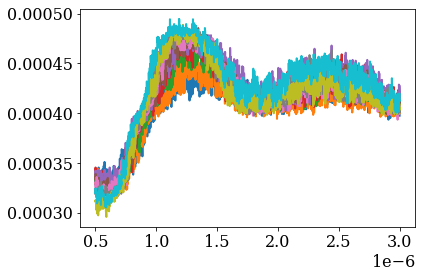

In [7]:
[plt.plot(sweep['expt'].time[n], sweep['expt'].v1up[n]) for n in range(10)];

## Sweep the pulse length to maximize the signal

In [ ]:
# 2D data
runinfo = ps.RunInfo()
def power(pow):
    devices.synth.c2_power = pow
#     pulse_change(devices, tpi2, parameters['port'])
runinfo.loop0 = ps.FunctionScan(ave_time, ps.drange(0.00001, 0.00005, 0.0005), dt=wait)

runinfo.measure_function = measure_echo
runinfo.sub_func = function_select[parameters['subtract']]
devices.scope.read_scope()

runinfo.current = 0
runinfo.parameters = parameters
runinfo.sltime = .00001#.02*2*runinfo.average

runinfo.wait_time = .1 # devices.fpga.period*runinfo.average/1e9*1.1

expt = ps.Sweep(runinfo, devices, parameters['outfile'].format(runinfo.current)+'AveTimeSweep')
expt.start_thread()

ps.live_plot2D(expt, x_name='t', y_name='ave_time', data_name='xsub', transpose=1)

In [26]:
# 2D data
runinfo = ps.RunInfo()
def phase_sweep(phase):
    change_phase(devices, phase, parameters['ave'], parameters['sltime'])
runinfo.loop0 = ps.FunctionScan(phase_sweep, ps.drange(0, 30, 360), dt=wait)

runinfo.measure_function = measure_echo
runinfo.sub_func = function_select[parameters['subtract']]
devices.scope.read_scope()

runinfo.current = 0
runinfo.parameters = parameters
# runinfo.sltime = .00001#.02*2*runinfo.average

runinfo.wait_time = .1 # devices.fpga.period*runinfo.average/1e9*1.1

expt = ps.Sweep(runinfo, devices, parameters['outfile'].format(runinfo.current)+'PhaseSweep')
expt.start_thread()

ps.live_plot2D(expt, x_name='t', y_name='phase_sweep', data_name='v1sub', transpose=1)

0

In [33]:
runinfo._indicies, runinfo._dims

((12,), (13,))

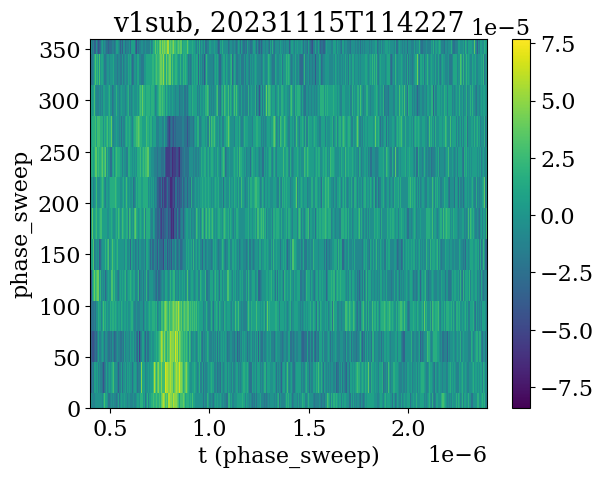

In [34]:
ps.live_plot2D(expt, x_name='t', y_name='phase_sweep', data_name='v1sub', transpose=1)

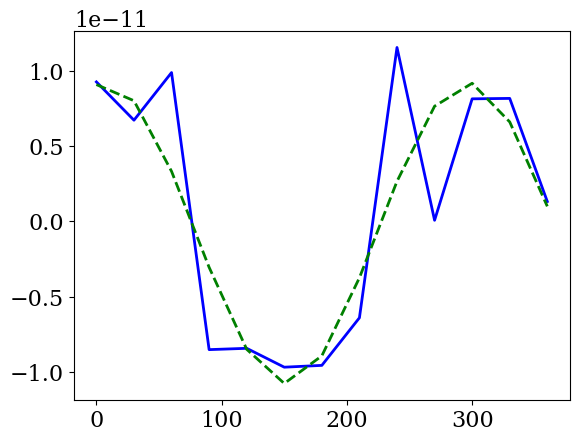

In [35]:
phfit = ut.plot_func_fit(ut.sinefit, np.array([expt.phase_sweep, expt.v1int]), [0, expt.v1int.max(), np.pi/180, 0])

In [12]:
phfit, (90-phfit[0][-1]*180/np.pi+90*(1-np.sign(phfit[0][1]))) % 360

(array([[-1.78646547e-12, -1.08003390e-11,  1.79278705e-02,
         -3.48813453e-01],
        [ 8.88537825e-13,  1.29942963e-12,  9.49373346e-04,
          1.96450885e-01]]),
 289.9855386842269)

In [9]:
phfit[0][-1]*180/np.pi

-19.98553868422694

In [ ]:
ps.live_plot2D(expt, x_name='t', y_name='pulse_time', data_name='v2sub', transpose=1)

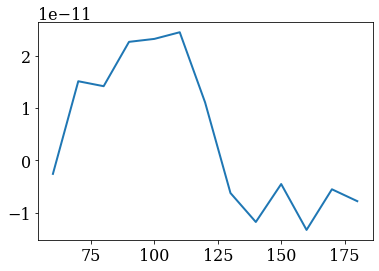

In [9]:
plt.plot(expt.pulse_time, expt.xint)

## Look for Rabi oscillations
If you get a good signal from your pulse_time sweep, choose the time that gives the best-looking signal, and then we'll do a nutation experiment to look for Rabi oscillations.

In [6]:
pulse_time(175) # Put in the time that looked best

NameError: name 'pulse_time' is not defined

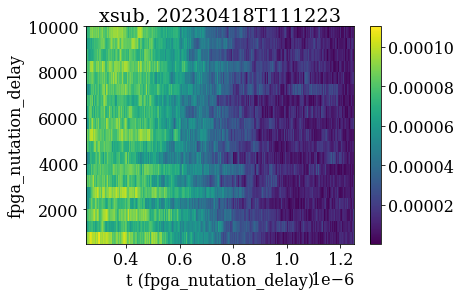

In [39]:
# 2D data
runinfo = ps.RunInfo()
runinfo.loop0 = ps.PropertyScan({'fpga': ps.drange(500, 500, 10000)}, prop='nutation_delay', dt=0.1)

runinfo.measure_function = measure_echo
runinfo.sub_func = function_select[parameters['subtract']]
devices.scope.read_scope()

runinfo.current = 0
runinfo.parameters = parameters
# runinfo.sltime = .02*2*runinfo.average

runinfo.wait_time = .1 # devices.fpga.period*runinfo.average/1e9*1.1

expt = ps.Sweep(runinfo, devices, parameters['outfile'].format(runinfo.current)+'RT1')
expt.start_thread()

ps.live_plot2D(expt, x_name='t', y_name='fpga_nutation_delay', data_name='xsub', transpose=1)

/Research/Acquisition/pyscan-master/notebooks/collett_spectrometer/../../../pyscan-master/pyscan/plotting/basicplots.py:79: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  c = plt.pcolormesh(pg.x, pg.y, pg.data.T,


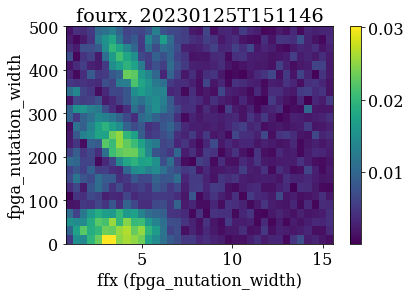

In [31]:
expt.fourx = expt.fourier[:, 2, 2:40]
expt.ffx = expt.ffreqs[:, 2:40]/1e6
ps.plot2D(expt, x_name='ffx', y_name='fpga_nutation_width', data_name='fourx', transpose=1)

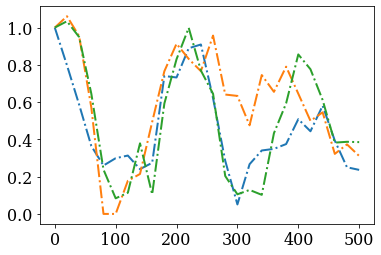

In [44]:
plt.plot(expt.fpga_nutation_width, expt.xint/expt.xint[0], '-.')
plt.plot(expt.fpga_nutation_width, expt.v1famp/expt.v1famp[0], '-.')
plt.plot(expt.fpga_nutation_width, expt.fourier[:, 1, 9]/expt.fourier[0, 1, 9], '-.')

105.83612750317931

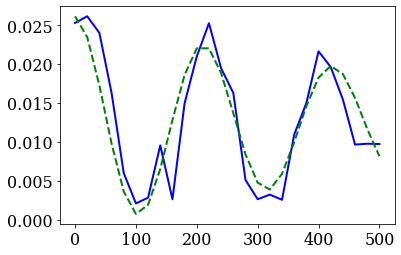

In [40]:
def rabifit(x, a, t, T, b):
    return a*np.exp(-x/t)*np.cos(2*np.pi/T*x)+b
guess = [.03, 1000, 200, .001]
# rfit = ut.plot_func_fit(rabifit, np.array([expt.fpga_nutation_width, expt.xint]), guess)
rfit = ut.plot_func_fit(rabifit, np.array([expt.fpga_nutation_width, expt.fourier[:, 1, 9]]), guess)
tpio2 = rfit[0][2]/2
tpio2

## Do a $T_1$ sweep

In [9]:
devices.fpga.nutation_delay = 1e4
devices.fpga.nutation_width = 0

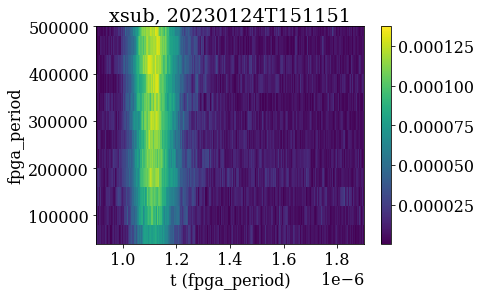

In [10]:
# 2D data
runinfo = ps.RunInfo()
runinfo.loop0 = ps.PropertyScan({'fpga': ps.drange(4e4, 4e4, 5e5)}, prop='period', dt=wait)

runinfo.measure_function = measure_echo
runinfo.sub_func = function_select[parameters['subtract']]
devices.scope.read_scope()

runinfo.current = 0
runinfo.parameters = parameters
runinfo.sltime = .02*2*parameters['ave']

runinfo.wait_time = .1 # devices.fpga.period*runinfo.average/1e9*1.1

expt = ps.Sweep(runinfo, devices, parameters['outfile'].format(runinfo.current)+'T1')
expt.start_thread()

ps.live_plot2D(expt, x_name='t', y_name='fpga_period', data_name='xsub', transpose=1)

KeyboardInterrupt: 

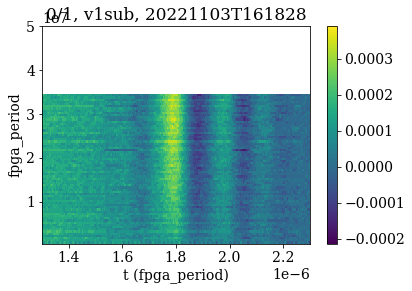

In [130]:
ps.live_plot2D(expt, x_name='t', y_name='fpga_period', data_name='v1sub', transpose=1)

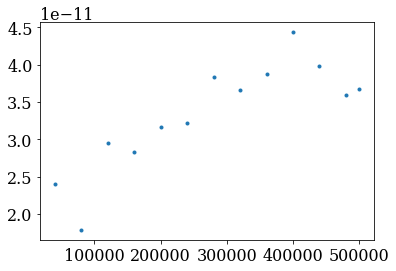

In [11]:
plt.plot(expt.fpga_period, expt.xint, '.')
# expt.v1famp[expt.runinfo.loop0.i-1]

In [9]:
expt.runinfo.running = False

Exception in thread Thread-8:
Traceback (most recent call last):
  File "/home/collettlab/anaconda3/lib/python3.9/threading.py", line 973, in _bootstrap_inner
    self.run()
  File "/home/collettlab/anaconda3/lib/python3.9/threading.py", line 910, in run
    self._target(*self._args, **self._kwargs)
  File "/Research/Acquisition/pyscan-master/notebooks/collett_spectrometer/../../../pyscan-master/pyscan/measurement/sweep.py", line 105, in run
    self.save_point()
  File "/Research/Acquisition/pyscan-master/notebooks/collett_spectrometer/../../../pyscan-master/pyscan/measurement/metasweep.py", line 147, in save_point
    elif np.array([f[key].shape == self[key].shape]).all():
  File "h5py/_objects.pyx", line 54, in h5py._objects.with_phil.wrapper
  File "h5py/_objects.pyx", line 55, in h5py._objects.with_phil.wrapper
  File "/home/collettlab/anaconda3/lib/python3.9/site-packages/h5py/_hl/group.py", line 305, in __getitem__
    oid = h5o.open(self.id, self._e(name), lapl=self._lapl)
  Fi

array([[ 4.20993643e-11, -2.67473170e-11,  2.02065790e+05,
         2.54924453e+09],
       [ 5.06079354e-12,  4.46162620e-12,  1.20866740e+05,
         1.52484433e+09]])

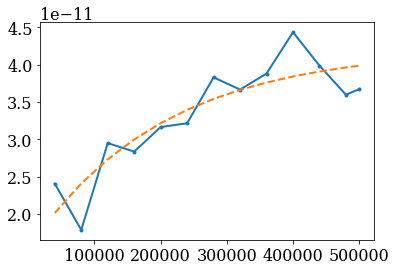

In [12]:
# plt.plot(expt.fpga_period[expt.runinfo.loop0.i-1], expt.v1famp[expt.runinfo.loop0.i-1], '.')
ut.plot_exp_fit_norange(np.array([expt.fpga_period, expt.xint]), parameters['freq'])

## Do a Hahn Echo delay sweep
The Rabi oscillation experiment tells you what your pulse times really should be for $\pi/2$ and $\pi$, with the first zero in the oscillation being the length of the $\pi$ pulse. Put that in, and then you can do a proper Hahn echo sweep, seeing how the size of the echo depends on the delay time.

In [7]:
pulse_time(100) # Put in the time that looked best
devices.fpga.nutation_width = 0

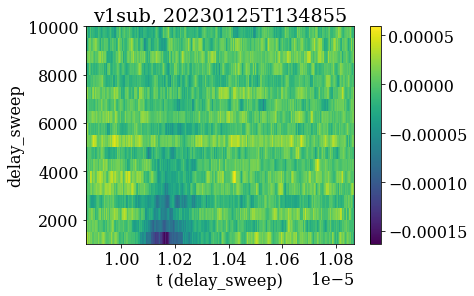

In [8]:
# 2D data
runinfo = ps.RunInfo()
def delay_sweep(delay):
    delay_change(devices, delay)
runinfo.loop0 = ps.FunctionScan(delay_sweep, ps.drange(1000, 500, 10000), dt=wait)

runinfo.measure_function = measure_echo
runinfo.sub_func = function_select[parameters['subtract']]
devices.scope.read_scope()

runinfo.current = 0
runinfo.parameters = parameters
# runinfo.sltime = .02*parameters['ave']

runinfo.wait_time = .1 # devices.fpga.period*runinfo.average/1e9*1.1

expt = ps.Sweep(runinfo, devices, parameters['outfile'].format(runinfo.current)+'Hahn')
expt.start_thread()

ps.live_plot2D(expt, x_name='t', y_name='delay_sweep', data_name='v1sub', transpose=1)

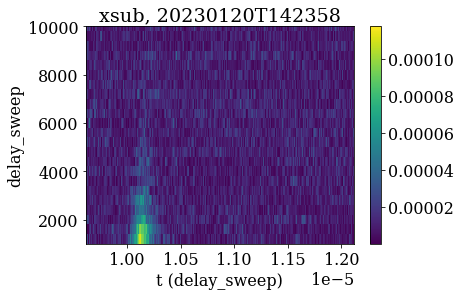

In [167]:
ps.live_plot2D(expt, x_name='t', y_name='delay_sweep', data_name='xsub', transpose=1)

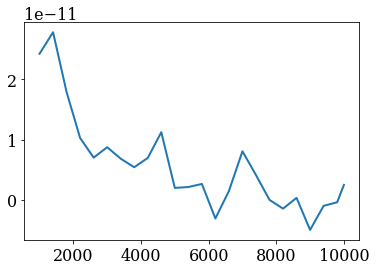

In [168]:
plt.plot(expt.delay_sweep, expt.xint)

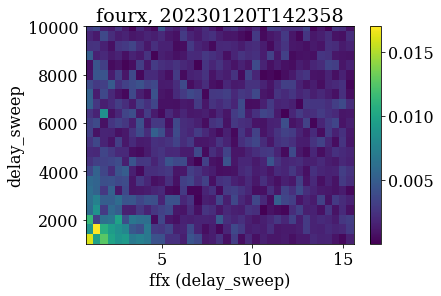

In [164]:
expt.fourx = expt.fourier[:, 2, 2:40]
expt.ffx = expt.ffreqs[:, 2:40]/1e6
ps.plot2D(expt, x_name='ffx', y_name='delay_sweep', data_name='fourx', transpose=1)

In [83]:
expt.runinfo.running = False

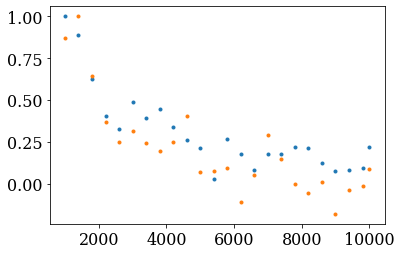

In [179]:
fdat = expt.fourier[:, 1, 4]
plt.plot(expt.delay_sweep, fdat/fdat.max(), '.', expt.delay_sweep, expt.xint/expt.xint.max(), '.')

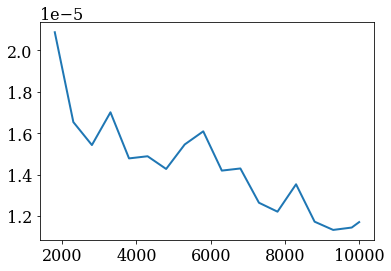

In [75]:
plt.plot(expt.delay_sweep, [np.mean(x[:1000]) for x in expt.xsub])

array([[4.06279404e-03, 4.42796165e-02, 1.67018959e+03, 2.10826684e+07],
       [8.84634053e-04, 6.77898921e-03, 2.99519273e+02, 3.78080760e+06]])

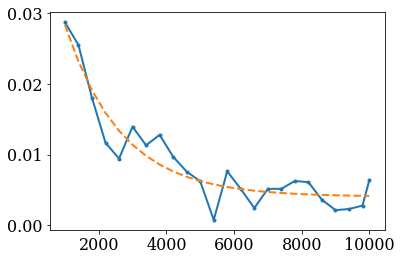

In [177]:
ut.plot_exp_fit_norange(np.array([expt.delay_sweep, fdat]), parameters['freq'])

# Echo-Detected Field Sweep

In [6]:
devices.synth.c_freqs = 4028
pulse_time(90)

In [139]:
parameters['field_step']

1.5

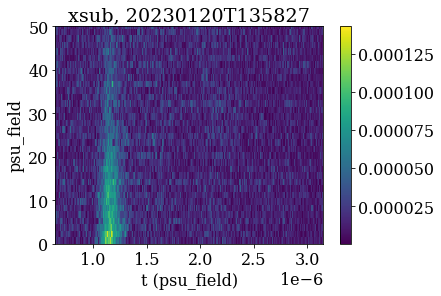

In [140]:
# 2D data
runinfo = ps.RunInfo()
runinfo.loop0 = ps.PropertyScan({'psu': ps.drange(parameters['field_start'],
                                                  parameters['field_step'],
                                                  parameters['field_end'])}, prop='field', dt=wait)

runinfo.measure_function = measure_echo
runinfo.sub_func = function_select[parameters['subtract']]
devices.scope.read_scope()

runinfo.current = 0
runinfo.parameters = parameters
# runinfo.sltime = .02*2*runinfo.average

runinfo.wait_time = 0.1 # devices.fpga.period*runinfo.average/1e9*1.1

expt = ps.Sweep(runinfo, devices, parameters['outfile'].format(runinfo.current)+'EDFS')
expt.start_thread()

ps.live_plot2D(expt, x_name='t', y_name='psu_field', data_name='xsub', transpose=1)

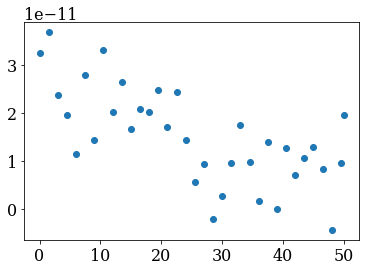

In [149]:
plt.plot(expt.psu_field, expt.xint, 'o')

/Research/Acquisition/pyscan-master/notebooks/collett_spectrometer/utility.py:55: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  c = plt.pcolormesh(A,  B, z)


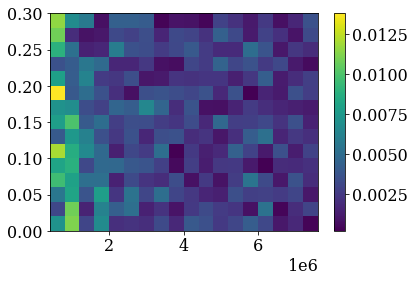

In [44]:
ut.plot_mesh(expt.ffreqs[0, 1:20], expt.get_field, expt.fourier[:, 1, 1:20], '', '', '')

In [48]:
expt.runinfo.parameters['freq']

4271.5

# Echo-Detected Temp Sweep

In [21]:
5000/60

83.33333333333333

AttributeError: 'Sweep' object has no attribute 'psu_field'

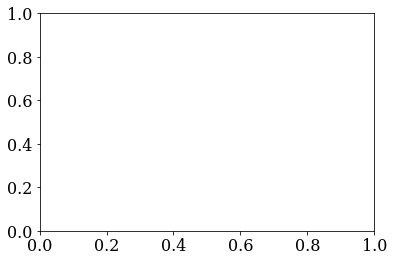

/Research/Acquisition/pyscan-master/notebooks/collett_spectrometer/utility.py:221: RuntimeWarning: invalid value encountered in true_divide
  return b + a * (w / 2)**2 / ((x - f)**2 + (w / 2)**2) + slope * (x - gf)
/home/collettlab/anaconda3/lib/python3.9/site-packages/scipy/optimize/minpack.py:833: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',


In [22]:
# 2D data
runinfo = ps.RunInfo()
runinfo.loop0 = ps.RepeatScan(1000, dt=10)

runinfo.measure_function = measure_echo
runinfo.sub_func = function_select[parameters['subtract']]
devices.scope.read_scope()

runinfo.current = 0
runinfo.parameters = parameters
# runinfo.sltime = .02*2*runinfo.average

runinfo.wait_time = 0.1 # devices.fpga.period*runinfo.average/1e9*1.1

expt = ps.Sweep(runinfo, devices, parameters['outfile'].format(runinfo.current)+'EDTS')
expt.start_thread()

ps.live_plot2D(expt, x_name='t', y_name='psu_field', data_name='xsub', transpose=1)

In [95]:
times = []
echo = []
emean = []
start = datetime.now().timestamp()

def read_echo():
    time = datetime.now().timestamp()
    dt = (time-start)/60
#     echo_int = subback_phase(devices, 16, ph, dphase=180)[-1]
    data = subback_delay(devices, 128, delay)
    echo_int = data.xint
#     emout = np.mean(data[5][850:1000])
    times.append(time)
    echo.append(echo_int)
#     emean.append(emout)
    
#     save_temp(times, temps)
    
#     return [[time, time], [temp, setpoint]]
    return dt, echo_int#[echo_int, emout]

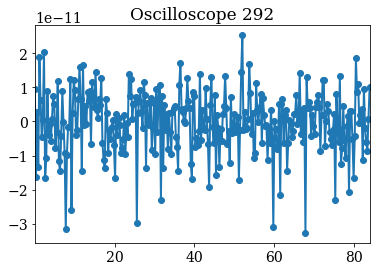

In [96]:
ps.oscilloscope(read_echo, np.inf, 0.1)#, numy=2)

/tmp/ipykernel_9173/2302801622.py:2: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  c = plt.pcolormesh(A,  B, expt.xsub)


[<AxesSubplot:>, <AxesSubplot:label='<colorbar>'>]

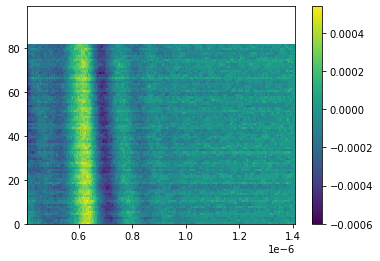

In [214]:
A, B = np.meshgrid(expt.t, expt.repeat)
c = plt.pcolormesh(A,  B, expt.xsub)
plt.colorbar(c)
test = plt.gcf().axes[-1]
if test.get_label() == '<colorbar>':
    test.cla()

plt.colorbar(c, cax=test)
test = plt.gcf().axes[-1]
if test.get_label() == '<colorbar>':
    test.cla()

plt.colorbar(c, cax=test)
plt.gcf().axes

In [64]:
devices.synth.c1_freq = 4000

In [65]:
test = [devices.scope.read_vxy() for n in range(200)]

In [66]:
from spinecho_scripts import *
[fourier_signal(t, 0) for t in test];

/Research/Acquisition/pyscan-master/notebooks/collett_spectrometer/utility.py:411: RuntimeWarning: invalid value encountered in sqrt
  err = np.sqrt(np.diag(fit[1]))
/Research/Acquisition/pyscan-master/notebooks/collett_spectrometer/utility.py:221: RuntimeWarning: invalid value encountered in true_divide
  return b + a * (w / 2)**2 / ((x - f)**2 + (w / 2)**2) + slope * (x - gf)
/home/collettlab/anaconda3/lib/python3.9/site-packages/scipy/optimize/minpack.py:833: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',


In [61]:
np.mean([t.fourier[1] for t in test], axis=0)

array([0.671686  , 0.14017751, 0.09298687, ..., 0.00429423, 0.0036866 ,
       0.003522  ])

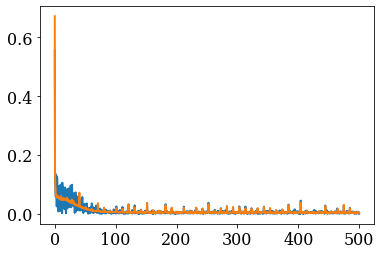

In [62]:
plt.plot(test[0].ffreqs/1e6, test[0].fourier[1], test[0].ffreqs/1e6, np.mean([t.fourier[1] for t in test], axis=0))

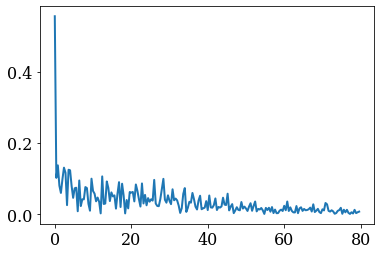

In [63]:
plt.plot(test[0].ffreqs[:200]/1e6, test[0].fourier[1][:200])

# Power Off

In [214]:
devices.synth.power_off()